In [154]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
%matplotlib inline  
import matplotlib.pyplot as plt  

### Part 1: Perceptron by hand

In [5]:
#1
x1=[3,0,3,0]
x2=[1,1,0,0]
y=[1,1,1,0]

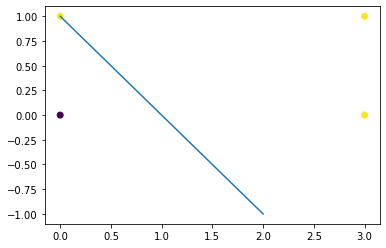

In [13]:
plt.scatter(x1, x2, c = y)
plt.plot([-0.5,1], [1,-1]], linestyle = 'solid')

x1 or x2 or both are activated, they will sum to a positive number that is greater than the threshold of 0

## 2
w1 = (1/3) 
w2 = 1 or 1.1 to make clear the difference that its corresponding to an OR function.

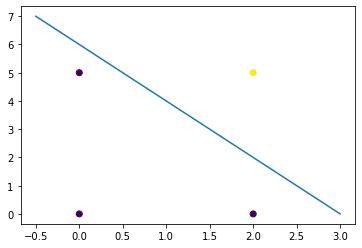

In [72]:
#3
x1=[2,2,0,0]
x2=[5,0,5,0]
y=[1,0,0,0]
plt.scatter(x1,x2, c =y)
plt.plot([-0.5, 3], [7,0], linestyle='solid')


In [ ]:
#3 
w0 = -6
w1 = 1
w2 = 1

5+2-6 = 1
5-6 = -1

In [ ]:
#4 
w0 = -1
w1 = (1/2)
w2 = (1/5)

/Users/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


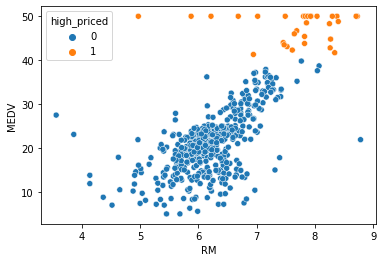

In [36]:
#6
from sklearn.datasets import load_boston
bdata = load_boston()

df = pd.DataFrame(bdata.data, columns = bdata.feature_names)
df["MEDV"] = boston.target
high_priced = df.MEDV > 40

df["high_priced"] = high_priced
df["high_priced"] = df["high_priced"].astype(int)

sns.scatterplot('RM', 'MEDV', data= df, hue='high_priced')
plt.show()

In [160]:
#7
# Creating an X input matrix and a Y output vector
x_start = np.array(df[['RM','MEDV']])
y = (np.array(df[['high_priced']])).T
# medv_array = np.array(df.MEDV)
# rm_array = np.array(df.RM)
# X = np.column_stack((medv_array, rm_array))
# high_priced_array = np.array(df.high_priced)
# y = np.array('high_priced').T

print(x_start.shape)
print(y.shape)

(506, 2)
(1, 506)


In [164]:
#8
bias= np.ones(len(df))
x = np.insert(x_start, 0, bias, axis =1)
print(X.shape)
X[:5]

(506, 3)


array([[24.   ,  6.575,  1.   ],
       [21.6  ,  6.421,  1.   ],
       [34.7  ,  7.185,  1.   ],
       [33.4  ,  6.998,  1.   ],
       [36.2  ,  7.147,  1.   ]])

In [82]:
#9
step = 0.01
weights = np.random.rand(X.shape[1])
print('(step, w):', step, weights)

(step, w): 0.01 [0.74158476 0.30746542 0.06251567]


In [165]:
#10 
# myPerceptron that takes in the following four inputs: X, Y, a vector of
# weights, and your step size
def myPerceptron(X, y, weights, step):
    err_count = 0
    for i in range(len(X)):
        if ((np.sum(X[i]* weights) > 0) and not (y[0][i])):
            err_count += 1
            for k in range(3):
                weights[k] = weights[k] - (X[i][k]*step)
        elif ((np.sum(X[i]* weights) < 0) and y[0][i]):
            err_count += 1
            for k in range(3):
                weights[k] = weights[k] + (X[i][k]*step)
    
    
    return(weights, err_count)


In [166]:
#print(y[0][0])
np.shape(y)

(1, 506)

In [182]:
#11
err = 1
weights = weights
while err > 0:
    weights, err = myPerceptron(X,y,weights,0.01)
print(weights, err)

In [181]:
#12
plt.plot('RM', 'MEDV', data= df, c='high_priced')
xline = np.linespace(0,10,100)
yline = -(xline *weights[1] + weights[0]) / weights[2]
plt.plot(xline, yline)

### Part 3: Out-of-the-box Neural Networks

In [178]:
#14
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('high_priced',axis=1), df['high_priced'],test_size=0.2, random_state = 3)


size_test_score = []
size_train_score = []
size_test_accuracy = []
size_train_accuracy= []
indices = []
for size1 in [2]:
    for size2 in [2,5,10,20,50,100]:
        n_net = MLPRegressor(hidden_layer_sizes=(size1,size2),max_iter=1000).fit(X_train, y_train)
        size_test_score.append(n_net.score(X_test, y_test))
        size_train_score.append(n_net.score(X_train, y_train))
        size_test_accuracy.append(accuracy_score(y_test, np.where(n_net.predict(X_test)> 1, 1, 0)))
        size_train_accuracy.append(accuracy_score(y_train, np.where(n_net.predict(X_train)> 1, 1, 0)))
        indices.append(size1 * 10 + size2)

/Users/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anaconda3/lib/python3.8/site-packages/sklearn/neural_

In [ ]:
nn.predict(X_test)

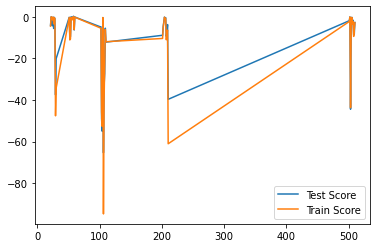

In [179]:
plt.plot(indices, size_test_score, label ='Test Score')
plt.plot(indices, size_train_score, label ='Train Score')
plt.legend()